<div align="center">

  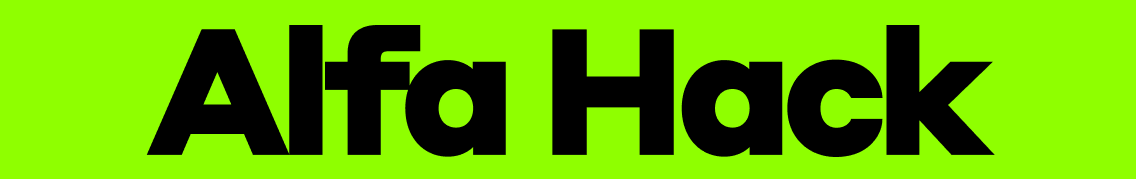

</div>

## Этап 1. Установка библиотек и импорт данных

In [5]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import os

In [166]:
import glob
import pandas as pd

# Путь к файлам с тренировочными данными и тестовыми данными
path = '/kaggle/input/alfa-hack/'  # Общий путь к папке

# Файлы train
filenames_train = glob.glob(path + "train_*.csv")

# Создадим список для записи считанных файлов train
data_files_train = []

# Считаем все файлы train и добавим их в список
for filename in filenames_train:
    data_files_train.append(pd.read_csv(filename))

# Объединим тренировочные данные в единый датасет
data_train = pd.concat(data_files_train, ignore_index=True)

# Выведем информацию о размерности полученных тренировочных данных
display('Размерность полных тренировочных данных составляет: {} строк и {} столбцов'.format(*data_train.shape))

# Выведем первые 5 строк тренировочных данных
display(data_train.head())

# Удостоверимся, что перед нами данные только из выборки train
if 'smpl' in data_train.columns:
    display(data_train['smpl'].value_counts(dropna=False))

# Файлы test
filenames_test = glob.glob(path + "test_*.csv")

# Создадим список для записи считанных файлов test
data_files_test = []

# Считаем все файлы test и добавим их в список
for filename in filenames_test:
    data_files_test.append(pd.read_csv(filename))

# Объединим тестовые данные в единый датасет
data_test = pd.concat(data_files_test, ignore_index=True)

# Выведем информацию о размерности полученных тестовых данных
display('Размерность полных тестовых данных составляет: {} строк и {} столбцов'.format(*data_test.shape))

# Выведем первые 5 строк тестовых данных
display(data_test.head())

# Удостоверимся, что перед нами данные только из выборки test
if 'smpl' in data_test.columns:
    display(data_test['smpl'].value_counts(dropna=False))


'Размерность полных тренировочных данных составляет: 38731 строк и 421 столбцов'

,target,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_409,feature_410,feature_411,feature_412,feature_413,feature_414,feature_415,feature_416,feature_417,feature_418
0,0,train,34857,-1.356552,0.250448,0.0,-0.672473,1.323705,0.378852,-0.245410,...,1.295397,0.556607,0.0,-0.458925,-0.297588,0.716096,0.153167,0.688763,0.279964,2.044856
1,0,train,34858,0.814895,0.506745,0.0,-0.356220,-0.094289,-0.214182,1.380268,...,-0.580941,-0.664461,0.0,1.142195,-1.133484,-0.677092,-1.690559,-0.196790,-0.920647,-0.836200
2,0,train,34859,-1.709360,0.654918,1.0,-0.213079,0.793039,-0.509969,-0.865946,...,0.703689,0.304279,0.0,0.196485,-0.248792,-1.478100,-0.626520,-1.092250,0.304325,1.007064
3,0,train,34860,-0.653116,0.315064,1.0,-0.178109,0.467477,-0.660796,-0.791823,...,-1.709754,1.121424,0.0,0.104662,-0.093930,-1.249617,-1.478420,0.616691,0.877856,0.011919
4,0,train,34861,0.775691,0.505516,0.0,1.735525,-1.308385,0.384870,0.288678,...,0.575846,-0.188595,0.0,-0.883663,-0.037110,1.667855,1.814537,1.773647,-0.563510,1.095201


smpl
train    38731
Name: count, dtype: int64

'Размерность полных тестовых данных составляет: 19826 строк и 420 столбцов'

,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_409,feature_410,feature_411,feature_412,feature_413,feature_414,feature_415,feature_416,feature_417,feature_418
0,test,44677,-1.139044,-1.613365,0.0,0.701305,0.143671,-0.033110,2.888458,-0.499518,...,-0.085803,1.106014,0.0,1.025667,1.817840,1.711201,0.635159,-1.363939,0.625595,0.900049
1,test,44678,0.360925,-0.710915,0.0,-0.732939,0.743381,0.169074,0.214672,1.501170,...,2.262538,2.607833,0.0,0.515787,-0.698113,0.714653,-0.357584,-0.040989,0.455856,1.315660
2,test,44679,-0.148810,0.945249,0.0,0.361138,0.514084,1.331961,-0.310956,1.125401,...,1.836223,0.878402,0.0,1.228964,2.135535,0.174202,-0.068949,0.295704,-0.458389,0.585332
3,test,44680,-1.582684,-0.848939,0.0,-0.541297,2.229274,0.372914,0.747887,-0.683596,...,1.241232,0.980317,0.0,0.925411,-0.490160,1.134922,1.397722,1.833712,-1.213087,-1.536136
4,test,44681,1.656777,-0.117977,1.0,0.131268,-1.716281,-1.026044,-0.563531,1.147413,...,-0.580932,0.372442,0.0,-0.453621,0.715199,-1.346730,-1.549226,-0.373241,1.374066,-1.808463


smpl
test    19826
Name: count, dtype: int64

In [167]:
import warnings
warnings.filterwarnings('ignore')

In [168]:
categorical_features = ['feature_21', 'feature_198', 'feature_396']
req = ['feature_382','feature_104','feature_94','feature_86','feature_87','feature_283']

In [175]:
top_100_features = pd.read_csv('/kaggle/input/top-100-features/top_100_features.csv')

top_features_list = top_100_features['Feature'].tolist()

data_train_top_100 = data_train[top_features_list]
data_test_top_100 = data_test[top_features_list]

display(data_train_top_100.head())
display(data_test_top_100.head())


,feature_51,feature_354,id,feature_256,feature_45,feature_195,feature_296,feature_117,feature_291,feature_253,...,feature_380,feature_311,feature_112,feature_362,feature_7,feature_68,feature_331,feature_192,feature_123,feature_228
0,-0.525354,1.576790,34857,0.253141,0.181262,0.737638,0.255574,1.560971,-0.363577,1.515916,...,1.110033,0.335675,-0.423210,0.641174,-0.245410,0.086152,-1.356793,0.152754,0.799562,1.479711
1,-0.015019,-1.371096,34858,0.633853,0.003228,0.179400,-2.394461,1.612668,0.481088,-0.317720,...,0.768072,-0.602945,1.174802,-1.743419,1.380268,-0.023617,0.172854,0.409115,-1.254266,1.487642
2,-0.079468,-0.423106,34859,-0.880297,-0.996917,-1.196266,-0.831611,-1.027343,-0.003540,-1.827555,...,-0.260641,-0.045162,0.462990,-0.634361,-0.865946,0.168100,1.411343,-0.722456,-1.591601,0.829926
3,-0.533799,-1.058108,34860,-2.268792,1.494286,1.175442,-0.980020,-0.215297,-2.754713,1.087424,...,-0.076659,-0.274877,-0.540442,-0.309972,-0.791823,0.398428,0.173726,0.767642,-0.242654,0.708446
4,1.024931,1.199338,34861,1.615869,0.786330,-2.380279,0.928385,-0.672289,0.163650,0.443332,...,0.804539,2.038583,0.723370,1.555467,0.288678,0.925916,-0.274079,0.461574,1.411480,0.348685


,feature_51,feature_354,id,feature_256,feature_45,feature_195,feature_296,feature_117,feature_291,feature_253,...,feature_380,feature_311,feature_112,feature_362,feature_7,feature_68,feature_331,feature_192,feature_123,feature_228
0,-0.910697,2.236833,44677,-0.286038,0.201709,0.212902,0.526529,1.159523,2.313096,0.140197,...,-1.849768,0.270785,1.723577,-0.123025,2.888458,-1.259331,-0.042235,0.395576,-1.624667,-1.133009
1,0.762477,-0.174464,44678,-0.620899,-0.962672,-0.301481,0.264769,-0.341482,-0.274253,-0.366704,...,-1.543419,0.613684,-1.282216,0.824735,0.214672,-0.218694,-0.301484,-0.754896,0.852007,1.625203
2,0.081522,0.861763,44679,0.720524,-1.248842,-0.742978,-0.084628,-1.403342,-0.591376,0.331061,...,0.474513,0.575650,0.335273,0.002002,-0.310956,0.452192,-0.513497,-0.602566,0.338406,1.301248
3,2.220718,0.232189,44680,2.827848,-1.492800,0.455746,0.309119,0.315459,0.624796,-1.267716,...,-1.116491,0.747038,1.339047,1.081999,0.747887,0.885443,-0.074529,1.249255,-0.523305,-0.944941
4,1.319799,-1.116687,44681,-0.357208,0.432562,-2.274210,-1.209057,-0.352428,0.482103,0.432624,...,-0.538871,0.107022,0.498781,-0.671545,-0.563531,0.041096,0.667766,-1.038252,-0.232305,-0.076462


In [176]:
data_train_top_100 = data_train_top_100.join(data_train[categorical_features])
data_test_top_100 = data_test_top_100.join(data_test[categorical_features])

data_train_top_100 = data_train_top_100.join(data_train[req])
data_test_top_100 = data_test_top_100.join(data_test[req])

data_train_top_100 = data_train_top_100.drop('id',axis=1)
data_test_top_100 = data_test_top_100.drop('id',axis=1)

In [178]:
categorical_features = ['feature_339']

for col in categorical_features:
    data_train_top_100[col] = data_train_top_100[col].astype('category')
    data_test_top_100[col] = data_test_top_100[col].astype(
        'category')

## Этап 2. Работа с моделью

# OOF PREDICTION


In [192]:
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import lightgbm as lgb
def train_apps_all_with_oof(data_train1, data_test,nfolds=5):
    """
    Predict credit risk using OOF(Out of Fold) method 
    Parameter : df_train, df_test, nfolds count
    """
    ftr_app = data_train1
    target_app = data_train['target']            
 
    folds = KFold(n_splits = nfolds, shuffle=True, random_state = 42)
     
    oof_preds = np.zeros(ftr_app.shape[0])
     
    test_preds = np.zeros(data_test.shape[0])
    clf = LGBMClassifier(
                nthread=4,
                n_estimators=4000,
                learning_rate=0.005,
                max_depth = 7,
                num_leaves=49,
                colsample_bytree=0.613,
                subsample=0.78,
                max_bin=150,
                reg_alpha=3.564,
                reg_lambda=4.5,
                min_child_weight= 6,
                min_child_samples=80,
                verbose=-1
                )
    
    for fold_idx, (train_idx , valid_idx) in enumerate(folds.split(ftr_app, target_app)):
        print("##### iteration ", fold_idx, 'starts')
        train_x = ftr_app.iloc[train_idx, :]
        train_y = target_app.iloc[train_idx]
        valid_x = ftr_app.iloc[valid_idx, :]
        valid_y = target_app.iloc[valid_idx]

        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric= 'auc', categorical_feature=categorical_features,
                callbacks=[
        lgb.early_stopping(stopping_rounds=100),
    ])
        
        oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration = clf.best_iteration_)[:, 1]
        
        # num_iteration  - останавливается на времени ранней остановки
        # Предсказанные вероятности будут средним всех предсказаний
        test_preds += clf.predict_proba(data_test,num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits
        
    return clf, test_preds

In [193]:
train_data_cleaned, test_data_cleaned = remove_least_important_features(top_100_features, data_train_top_100, data_test_top_100, 9)

# Обучаем модель после удаления признаков
model, test_predictions = train_apps_all_with_oof(train_data_cleaned, test_data_cleaned)

##### iteration  0 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[452]	training's auc: 0.93601	training's binary_logloss: 0.0786575	valid_1's auc: 0.782685	valid_1's binary_logloss: 0.0921816
##### iteration  1 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[999]	training's auc: 0.977179	training's binary_logloss: 0.0625575	valid_1's auc: 0.797912	valid_1's binary_logloss: 0.0953926
##### iteration  2 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[198]	training's auc: 0.895316	training's binary_logloss: 0.0892273	valid_1's auc: 0.776146	valid_1's binary_logloss: 0.0967711
##### iteration  3 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[719]	training's auc: 0.960591	training's binary_logloss: 0.0698181	valid_1's auc: 0.767843	valid_1's binary_logloss: 0.09429

In [194]:
train_data_cleaned, test_data_cleaned = remove_least_important_features(top_100_features, data_train_top_100, data_test_top_100,12)

# Обучаем модель после удаления признаков
model, test_predictions = train_apps_all_with_oof(train_data_cleaned, test_data_cleaned)

##### iteration  0 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[33]	training's auc: 0.855578	training's binary_logloss: 0.101559	valid_1's auc: 0.773589	valid_1's binary_logloss: 0.100122
##### iteration  1 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	training's auc: 0.843013	training's binary_logloss: 0.101941	valid_1's auc: 0.770498	valid_1's binary_logloss: 0.107097
##### iteration  2 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[561]	training's auc: 0.945395	training's binary_logloss: 0.0750495	valid_1's auc: 0.778795	valid_1's binary_logloss: 0.0938921
##### iteration  3 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1104]	training's auc: 0.982644	training's binary_logloss: 0.0600818	valid_1's auc: 0.770155	valid_1's binary_logloss: 0.0939563
#

In [195]:
train_data_cleaned, test_data_cleaned = remove_least_important_features(importance_df, data_train_top_100, data_test_top_100,15)

# Обучаем модель после удаления признаков
model, test_predictions = train_apps_all_with_oof(train_data_cleaned, test_data_cleaned)

##### iteration  0 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1163]	training's auc: 0.984051	training's binary_logloss: 0.0595866	valid_1's auc: 0.786519	valid_1's binary_logloss: 0.0910476
##### iteration  1 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	training's auc: 0.837615	training's binary_logloss: 0.101764	valid_1's auc: 0.768702	valid_1's binary_logloss: 0.10695
##### iteration  2 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[976]	training's auc: 0.974675	training's binary_logloss: 0.0639132	valid_1's auc: 0.783302	valid_1's binary_logloss: 0.0930692
##### iteration  3 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[916]	training's auc: 0.972132	training's binary_logloss: 0.0650567	valid_1's auc: 0.768126	valid_1's binary_logloss: 0.0939319

In [196]:
train_data_cleaned, test_data_cleaned = remove_least_important_features(importance_df, data_train_top_100, data_test_top_100,18)

# Обучаем модель после удаления признаков
model, test_predictions = train_apps_all_with_oof(train_data_cleaned, test_data_cleaned)

##### iteration  0 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1020]	training's auc: 0.977761	training's binary_logloss: 0.062782	valid_1's auc: 0.788087	valid_1's binary_logloss: 0.090686
##### iteration  1 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[922]	training's auc: 0.968227	training's binary_logloss: 0.0656457	valid_1's auc: 0.796158	valid_1's binary_logloss: 0.0954705
##### iteration  2 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1289]	training's auc: 0.986082	training's binary_logloss: 0.0570218	valid_1's auc: 0.788192	valid_1's binary_logloss: 0.0926159
##### iteration  3 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[973]	training's auc: 0.974244	training's binary_logloss: 0.0639235	valid_1's auc: 0.768309	valid_1's binary_logloss: 0.0937

In [197]:
train_data_cleaned, test_data_cleaned = remove_least_important_features(importance_df, data_train_top_100, data_test_top_100,21)

# Обучаем модель после удаления признаков
model, test_predictions = train_apps_all_with_oof(train_data_cleaned, test_data_cleaned)

##### iteration  0 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[933]	training's auc: 0.972569	training's binary_logloss: 0.0652327	valid_1's auc: 0.787716	valid_1's binary_logloss: 0.0908794
##### iteration  1 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[12]	training's auc: 0.836362	training's binary_logloss: 0.102403	valid_1's auc: 0.772517	valid_1's binary_logloss: 0.107409
##### iteration  2 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1120]	training's auc: 0.979378	training's binary_logloss: 0.0610887	valid_1's auc: 0.788408	valid_1's binary_logloss: 0.0925678
##### iteration  3 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[643]	training's auc: 0.951197	training's binary_logloss: 0.0725859	valid_1's auc: 0.766709	valid_1's binary_logloss: 0.094334

In [198]:
train_data_cleaned, test_data_cleaned = remove_least_important_features(importance_df, data_train_top_100, data_test_top_100,24)

# Обучаем модель после удаления признаков
model, test_predictions = train_apps_all_with_oof(train_data_cleaned, test_data_cleaned)

##### iteration  0 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1210]	training's auc: 0.984886	training's binary_logloss: 0.0586669	valid_1's auc: 0.788475	valid_1's binary_logloss: 0.0906268
##### iteration  1 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	training's auc: 0.837838	training's binary_logloss: 0.102608	valid_1's auc: 0.767463	valid_1's binary_logloss: 0.107516
##### iteration  2 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1203]	training's auc: 0.981754	training's binary_logloss: 0.0595958	valid_1's auc: 0.785841	valid_1's binary_logloss: 0.0928225
##### iteration  3 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1263]	training's auc: 0.984825	training's binary_logloss: 0.0579187	valid_1's auc: 0.770778	valid_1's binary_logloss: 0.0933

In [95]:
import datetime
 
print("Starting Time " , datetime.datetime.now())
clf, test_preds = train_apps_all_with_oof(data_train_top_100, data_test_top_100)
print("End Time : ", datetime.datetime.now())

Starting Time  2024-11-11 14:21:06.961117
##### iteration  0 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[457]	training's auc: 0.989826	training's binary_logloss: 0.0553433	valid_1's auc: 0.789674	valid_1's binary_logloss: 0.0905615
##### iteration  1 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[510]	training's auc: 0.992004	training's binary_logloss: 0.0522712	valid_1's auc: 0.802802	valid_1's binary_logloss: 0.0946442
##### iteration  2 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[394]	training's auc: 0.982682	training's binary_logloss: 0.0597176	valid_1's auc: 0.784924	valid_1's binary_logloss: 0.0926729
##### iteration  3 starts
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[333]	training's auc: 0.97456	training's binary_logloss: 0.0643002	valid_1's auc: 

In [99]:
feature_importances = clf.feature_importances_

# Создаем DataFrame для всех признаков и их важности
importance_df = pd.DataFrame({
    'Feature': data_train_top_100.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Вывод 20 самых важных признаков
importance_df

,Feature,Importance
0,feature_51,335
4,feature_45,267
19,feature_11,248
6,feature_296,245
1,feature_354,244
...,...,...
45,feature_56,55
85,feature_29,54
102,feature_396,53
101,feature_198,16


In [ ]:
lgb.plot_tree(model, tree_index=0, figsize=(20, 10))
plt.title('Дерево модели LightGBM')
plt.show()

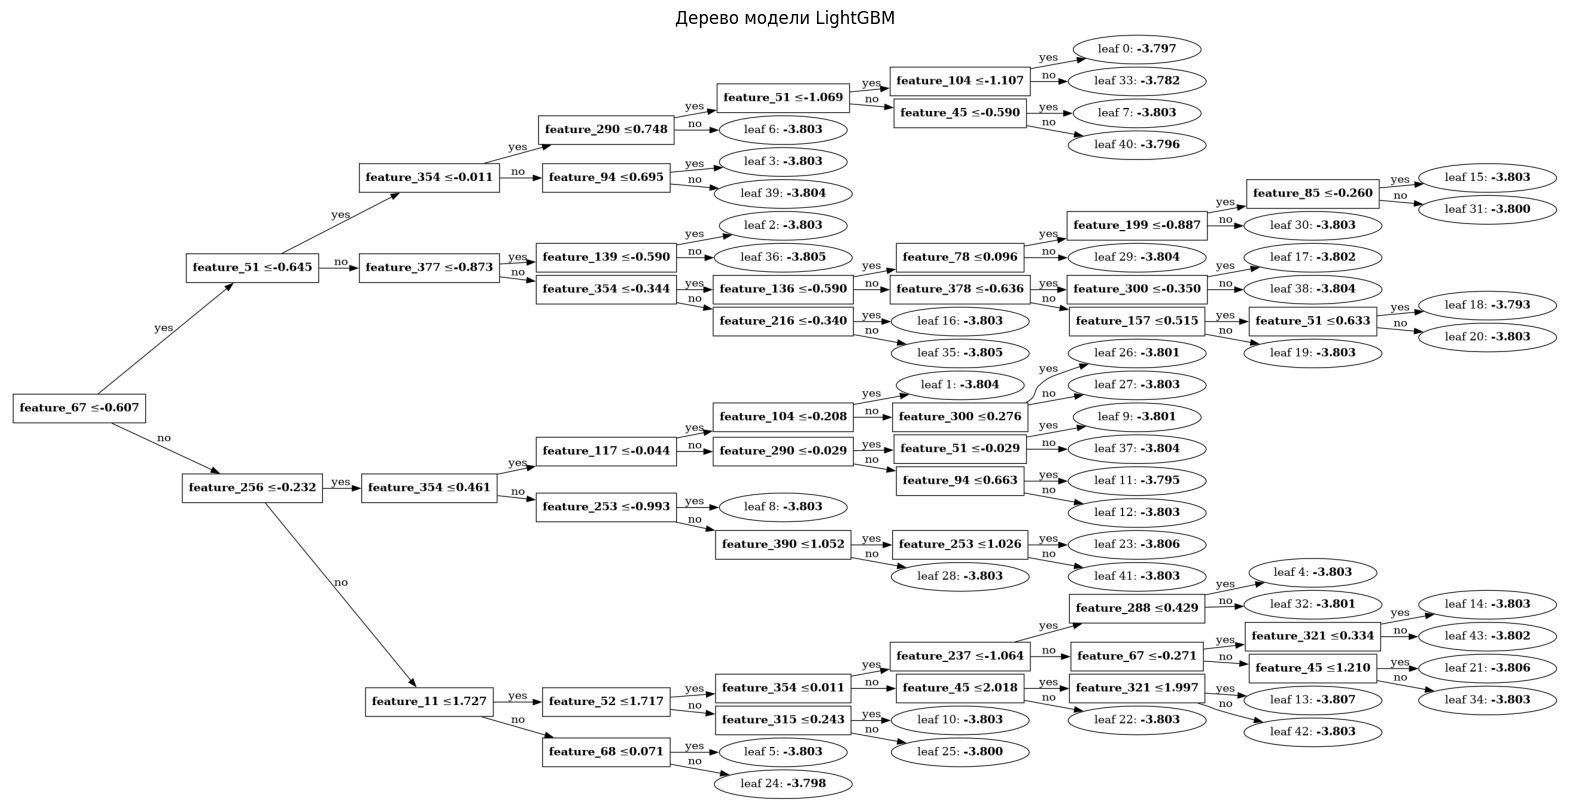

In [191]:
lgb.plot_tree(model, tree_index=0, figsize=(20, 10))
plt.title('Дерево модели LightGBM')
plt.show()

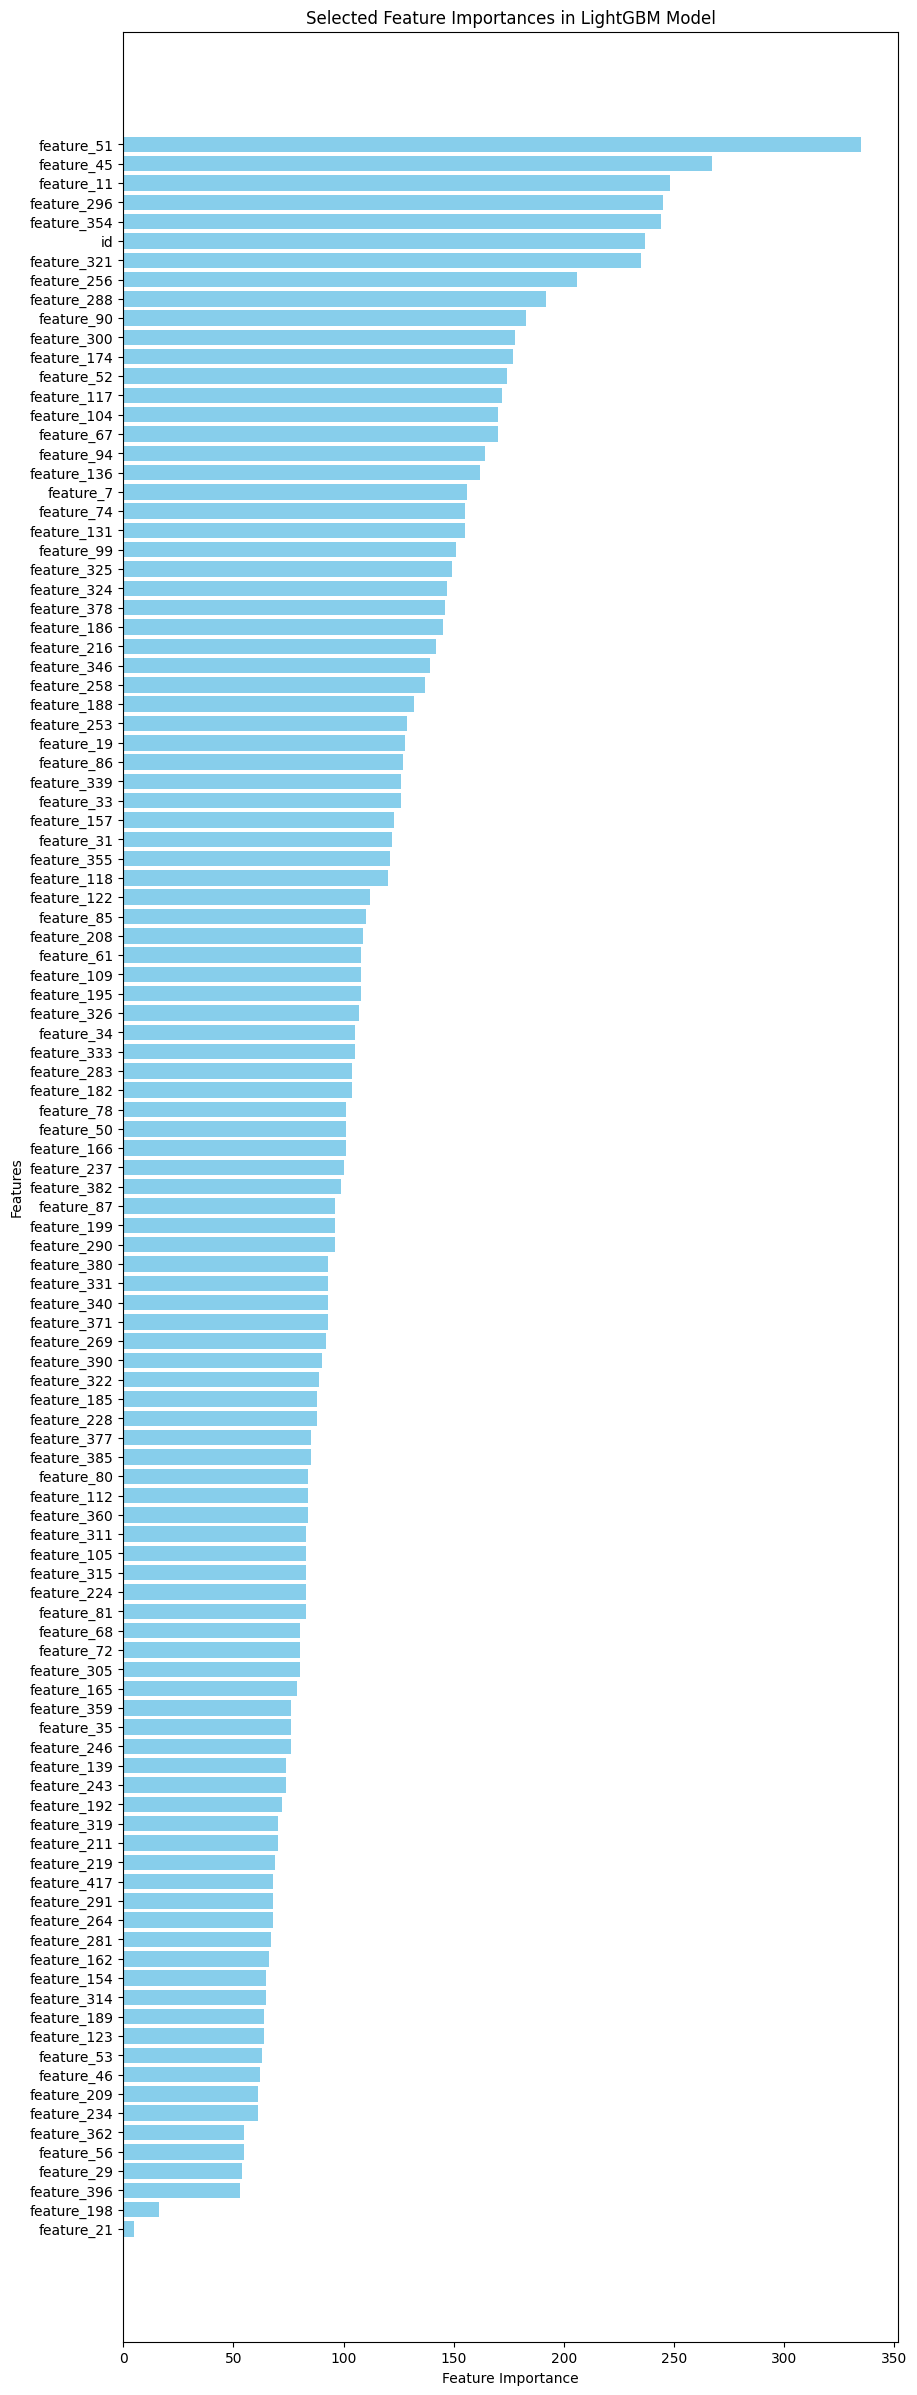

In [105]:
plt.figure(figsize=(10, 30))
plt.barh(importance_df['Feature'],importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Selected Feature Importances in LightGBM Model")
plt.show()

## Этап 3. Предсказание для тестовых данных




Получим предсказание на тестовых данных

In [ ]:
data_test['target'] = test_preds
data_test[['id', 'target']].to_csv('submission_case_oof.csv', index=False)